Лабораторна робота 2

Зчитуємо дані:

In [1]:
import pandas as pd
avrMarchTemp = pd.read_csv('data.csv', delimiter = ',')

Представлення даних:

In [2]:
avrMarchTemp.head()

,Date,Value,Anomaly
0,189503,39.6,-0.5
1,189603,38.2,-1.9
2,189703,33.0,-7.1
3,189803,37.1,-3.0
4,189903,37.9,-2.2


In [3]:
avrMarchTemp.tail()

,Date,Value,Anomaly
124,201903,34.6,-5.5
125,202003,38.8,-1.3
126,202103,41.5,1.4
127,202203,42.6,2.5
128,202303,37.7,-2.4


Форматування даних:

In [4]:
avrMarchTemp.columns = ['Date', 'Temperature', 'Anomaly']
avrMarchTemp.Date = avrMarchTemp.Date.floordiv(100)
avrMarchTemp

,Date,Temperature,Anomaly
0,1895,39.6,-0.5
1,1896,38.2,-1.9
2,1897,33.0,-7.1
3,1898,37.1,-3.0
4,1899,37.9,-2.2
...,...,...,...
124,2019,34.6,-5.5
125,2020,38.8,-1.3
126,2021,41.5,1.4
127,2022,42.6,2.5


Опис даних:

In [6]:
pd.set_option('display.precision', 2)
avrMarchTemp.Temperature.describe()

count    129.00
mean      40.09
std        3.00
min       32.20
25%       38.00
50%       40.10
75%       42.20
max       47.20
Name: Temperature, dtype: float64

Імпортуємо Seaborn та запишемо в нову зміну дані показників за 1895-2018 роки:

In [17]:
import seaborn as sns
snsAvrMarchTemp = avrMarchTemp[(avrMarchTemp.Date < 2019)].iloc[:, 0 : 2]

snsAvrMarchTemp

,Date,Temperature
0,1895,39.6
1,1896,38.2
2,1897,33.0
3,1898,37.1
4,1899,37.9
...,...,...
119,2014,40.1
120,2015,45.5
121,2016,42.7
122,2017,40.8


Графічно представимо ці дані:

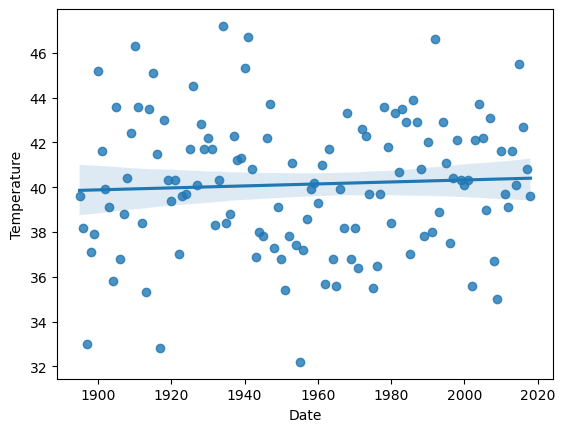

In [18]:
axes = sns.regplot(data=snsAvrMarchTemp, x="Date", y="Temperature")

Імпортуємо SciPy та створюємо лінійну регресію для прогнозу температур:

In [19]:
from scipy import stats

lin_reg = stats.linregress(x=snsAvrMarchTemp.Date, y=snsAvrMarchTemp.Temperature)
print(lin_reg.slope)
print(lin_reg.intercept)

0.004418568056648315
31.485716758457905


Робимо прогноз:

In [20]:
predict2019 = lin_reg.slope * 2019 + lin_reg.intercept
predict2020 = lin_reg.slope * 2020 + lin_reg.intercept
predict2021 = lin_reg.slope * 2021 + lin_reg.intercept
predict2022 = lin_reg.slope * 2022 + lin_reg.intercept
predict2023 = lin_reg.slope * 2023 + lin_reg.intercept

print('Прогноз температури на березень 2019:', predict2019)
print('Прогноз температури на березень 2020:', predict2020)
print('Прогноз температури на березень 2021:', predict2021)
print('Прогноз температури на березень 2022:', predict2022)
print('Прогноз температури на березень 2023:', predict2023)

Прогноз температури на березень 2019: 40.406805664830856
Прогноз температури на березень 2020: 40.4112242328875
Прогноз температури на березень 2021: 40.41564280094415
Прогноз температури на березень 2022: 40.4200613690008
Прогноз температури на березень 2023: 40.42447993705744


Оцінемо якою могла бути температура в березні 1891 року:

In [21]:
predict1891 = lin_reg.slope * 1891 + lin_reg.intercept
print('Прогноз температури на березень 1891:', predict1891)

Прогноз температури на березень 1891: 39.84122895357987


Масштабування осі у (від 25 до 60 градусів):

(25.0, 60.0)

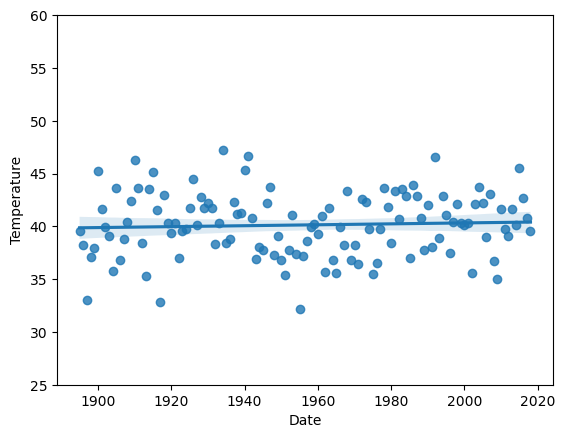

In [27]:
axes = sns.regplot(data=snsAvrMarchTemp, x="Date", y="Temperature")
axes.set_ylim(25, 60)

Порівняння отриманого прогнозу на 2019-2023 роки з реальними даними:

In [29]:
print('Прогноз на 2019:', predict2019)
print('Реальна температура в 2019:', avrMarchTemp.iat[-5, 1])
print()

print('Прогноз на 2020:', predict2020)
print('Реальна температура в 2020:', avrMarchTemp.iat[-4, 1])
print()

print('Прогноз на 2021:', predict2021)
print('Реальна температура в 2021:', avrMarchTemp.iat[-3, 1])
print()

print('Прогноз на 2022:', predict2022)
print('Реальна температура в 2022:', avrMarchTemp.iat[-2, 1])
print()

print('Прогноз на 2023:', predict2023)
print('Реальна температура в 2023:', avrMarchTemp.iat[-1, 1])
print()

Прогноз на 2019: 40.406805664830856
Реальна температура в 2019: 34.6

Прогноз на 2020: 40.4112242328875
Реальна температура в 2020: 38.8

Прогноз на 2021: 40.41564280094415
Реальна температура в 2021: 41.5

Прогноз на 2022: 40.4200613690008
Реальна температура в 2022: 42.6

Прогноз на 2023: 40.42447993705744
Реальна температура в 2023: 37.7

